# Analysis of AirBnb New York

### Content
+ Introduction: Airbnb New York
+ Data description and objectives
+ Data manipulation: cleaning and shaping
+ Data scraping


## 1. Introduction: Airbnb New York

Airbnb is the world's largest accommodation booking service. Apart from apartments, Airbnb's list of offerings includes rare residential properties such as castles, estates, yachts, horse ranches, trailers, and even private islands. The Internet site pays great attention to the comfort and safety of travel, therefore, a reliable payment system, a round-the-clock support service and a system of reviews about each host and guest have been created. Since 2008, more than 25 million travelers have used Airbnb's services, sharing the philosophy of the sharing economy - sharing goods and services based on human relationships and trust.


The company was founded by Brian Chesky, Joe Gebbia, and Nathan Blecharczyk in San Francisco during 2008 where they became one of the first to peer-to-peer services that specialized in housing accommodations. The founders were traveling to a conference in 2007 but couldn’t pay for their housing, so two of the founders decided to rent out part of their apartments in order to help pay for the cost of the trip. This sparked their idea. The founders wanted to change the way that people thought about travel. In 2009 they partnered with Y Combinator and expanded its limited offerings. They continued their expansion and capital raising efforts to eventually grow its operations internationally by acquiring Accoleo. Airbnb now has operations in 191 countries and is able to rent out a room, a home, or even a castle for a night or longer.


Airbnb is located in over 191 countries and continues to expand internationally. They have even been able to establish operations in Cuba and other countries where its legality might be in question. By doing this they have created a niche that caters to travelers; including: high spenders, penny pincers and everyone in between.

## 2. Data description and objectives

Airbnb has a lot of values that can be analyzed. 
Here is shown data which will be used for my analysis:
+ Id - unique code
+ Name - name and short description about apartments for rent
+ Host_id - unique value of apartment's owner
+ Host_name - owner's name
+ Neighbourhood_group - New York regions
+ Neighbourhood - name of the area inside of neighbourhood_group
+ Latitude - geographic latitude/location(coordinates)
+ Longtitude - geographic longtitude/location(coordinates)
+ Room_type - type of apartments for the rent
+ Price - price for different types of room
+ Minimum_nights - minimum amount of nights for staying at this apartments
+ Number_of_reviews - total amount of comments/feedback about apartments
+ Last_review - the date of last review on the web-site about particular room
+ Reviews_per_month - the mean of reviews about room per month
+ Calculated_host_listings_count - amount of listing per host
+ Availability_365 - number of days when listing is available for booking

# Questions

1. Hosts with a biggest amount of reviews
2. Which region is the most expensive in New York?
3. Which area in a New York regions is the most expensive?
4. Which room_type is the cheapest one?
5. Which host is the more preferred?

# Data cleaning and shaping

In [1]:
#libraries
import pandas as pd    #processing data, mostly needed to read csv file using pd.read_csv()             
from bs4 import BeautifulSoup      #represents the document as a nested data structure, this library mostly 
#used for pulling data out of html page
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AB_NYC_2019.csv') 
df
#read csv file and show it

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
df = pd.read_csv('AB_NYC_2019.csv') 
df = df.dropna(axis = 0, how ='any') 
df
#to analyze and drop rows/columns with Null values.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [4]:
df = df.drop(df.duplicated()[df.duplicated()].index.values) 
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [5]:
df.describe() #show count, mean, std, min,max in each column


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.isnull().sum().sort_values(ascending = False) # check missing data


availability_365                  0
calculated_host_listings_count    0
reviews_per_month                 0
last_review                       0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
neighbourhood_group               0
host_name                         0
host_id                           0
name                              0
id                                0
dtype: int64

# Data Scraping

In [7]:
# import pandas as pd        
# import requests
# from bs4 import BeautifulSoup

In [8]:
# text1 = []
# text2 = []
# text3 = []

# for x in range(0, 1000, 20):
#     req = requests.get("https://ru.airbnb.com/s/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&search_type=pagination&federated_search_session_id=85f2a593-69e1-4907-b0f4-2c5b32e28794&items_offset=" + str(x) + "&section_offset=7")
#     soup = BeautifulSoup(req.content,'lxml')
#     textof1 = soup.find_all("div", class_="_qf0valo")
#     textof2 = soup.find_all("ol", class_="_194e2vt2")
#     textof3 = soup.find_all("span", class_="_1p7iugi")
#     for i in range(0, 20):
#         text1.append(textof1[i].text)
#         text2.append(textof2[i].text.split("· ")[1])
#         text3.append(textof3[i].text.replace(u'Цена:$\xa0', u''))
#     print(str(x) + " PAGE")    
    
# dictionary = {"name":text1, 'location':text2, "cost":text3}
# ds = pd.DataFrame(dictionary)
# ds.to_csv('IDA_project/scrapZerdeli.csv')

In [9]:
ds = pd.read_csv('scrapZerdeli.csv') 
ds

,Unnamed: 0,name,location,cost
0,0,"One Bedroom, Cheap Pricing",Уиллистон,12
1,1,Belga Apartments,Ulcinj,19
2,2,LOFT古运河畔温馨的家,Yangzhou,23
3,3,Venice Every Day 3,Венеция,17
4,4,"Budget double room in London near Regents Park,",Большой Лондон,27
...,...,...,...,...
995,995,Loft nuevo a sólo 5 minutos caminando del mar!,Mazatlán,26
996,996,"Hermoso apartamento super ubicado,",Канкун,21
997,997,【悦曼民宿】1号房ins北欧风-万达商圈-市中心-凯德广场-飞机场-火车站-小区楼下美食街-...,Mianyang,22
998,998,Brand new studion flat London NW2,Большой Лондон,52


In [10]:
ds = ds.dropna(axis = 0, how ='any') 
ds

,Unnamed: 0,name,location,cost
0,0,"One Bedroom, Cheap Pricing",Уиллистон,12
1,1,Belga Apartments,Ulcinj,19
2,2,LOFT古运河畔温馨的家,Yangzhou,23
3,3,Venice Every Day 3,Венеция,17
4,4,"Budget double room in London near Regents Park,",Большой Лондон,27
...,...,...,...,...
995,995,Loft nuevo a sólo 5 minutos caminando del mar!,Mazatlán,26
996,996,"Hermoso apartamento super ubicado,",Канкун,21
997,997,【悦曼民宿】1号房ins北欧风-万达商圈-市中心-凯德广场-飞机场-火车站-小区楼下美食街-...,Mianyang,22
998,998,Brand new studion flat London NW2,Большой Лондон,52


In [11]:
ds = ds.drop(ds.duplicated()[ds.duplicated()].index.values) 
ds

,Unnamed: 0,name,location,cost
0,0,"One Bedroom, Cheap Pricing",Уиллистон,12
1,1,Belga Apartments,Ulcinj,19
2,2,LOFT古运河畔温馨的家,Yangzhou,23
3,3,Venice Every Day 3,Венеция,17
4,4,"Budget double room in London near Regents Park,",Большой Лондон,27
...,...,...,...,...
995,995,Loft nuevo a sólo 5 minutos caminando del mar!,Mazatlán,26
996,996,"Hermoso apartamento super ubicado,",Канкун,21
997,997,【悦曼民宿】1号房ins北欧风-万达商圈-市中心-凯德广场-飞机场-火车站-小区楼下美食街-...,Mianyang,22
998,998,Brand new studion flat London NW2,Большой Лондон,52


## Problem solving

## Question 1

In [12]:
df2 = df[['number_of_reviews', 'neighbourhood_group', 'name', 'id', 'host_name']] # 
df2.head()

,number_of_reviews,neighbourhood_group,name,id,host_name
0,9,Brooklyn,Clean & quiet apt home by the park,2539,John
1,45,Manhattan,Skylit Midtown Castle,2595,Jennifer
3,270,Brooklyn,Cozy Entire Floor of Brownstone,3831,LisaRoxanne
4,9,Manhattan,Entire Apt: Spacious Studio/Loft by central park,5022,Laura
5,74,Manhattan,Large Cozy 1 BR Apartment In Midtown East,5099,Chris


In [13]:
df2.sort_values(by = ['number_of_reviews'], ascending = 0)

,number_of_reviews,neighbourhood_group,name,id,host_name
11759,629,Queens,Room near JFK Queen Bed,9145202,Dona
2031,607,Manhattan,Great Bedroom in Manhattan,903972,Jj
2030,597,Manhattan,Beautiful Bedroom in Manhattan,903947,Jj
2015,594,Manhattan,Private Bedroom in Manhattan,891117,Jj
13495,576,Queens,Room Near JFK Twin Beds,10101135,Dona
...,...,...,...,...,...
35685,1,Manhattan,"Attractive FiDi 1BR w/ Office nook + Gym, Door...",28329243,Blueground
9664,1,Manhattan,"City retrieve1 -large bedroom, comfortable / q...",7428365,Jana
9669,1,Queens,Apt.-private entrance -Townhouse- 10mins. to JFK,7433174,Carl
9672,1,Manhattan,Steps Away From Grand Central,7434420,Tricia


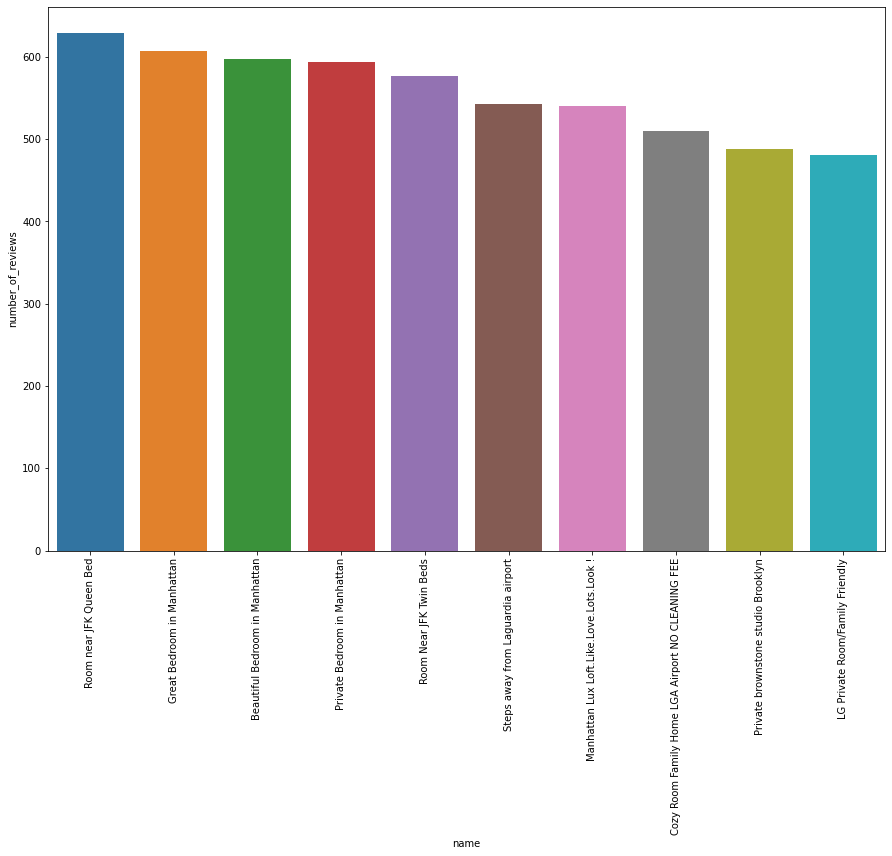

In [14]:
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(x = 'name', y = 'number_of_reviews', 
    data = df2.sort_values(by = ['number_of_reviews'], 
        ascending = 0).head(10),ax = ax) # created barplot and give values
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90); # rotate value of x for 90 degree


## Question 2

In [15]:
df2 = df[['neighbourhood_group', 'price']] # 
df2.head()

,neighbourhood_group,price
0,Brooklyn,149
1,Manhattan,225
3,Brooklyn,89
4,Manhattan,80
5,Manhattan,200


In [16]:
df2.groupby(['neighbourhood_group']).mean().reset_index().sort_values(by = ['price'], ascending = 0)


,neighbourhood_group,price
2,Manhattan,180.071596
1,Brooklyn,121.463289
3,Queens,95.783683
4,Staten Island,89.964968
0,Bronx,79.558857


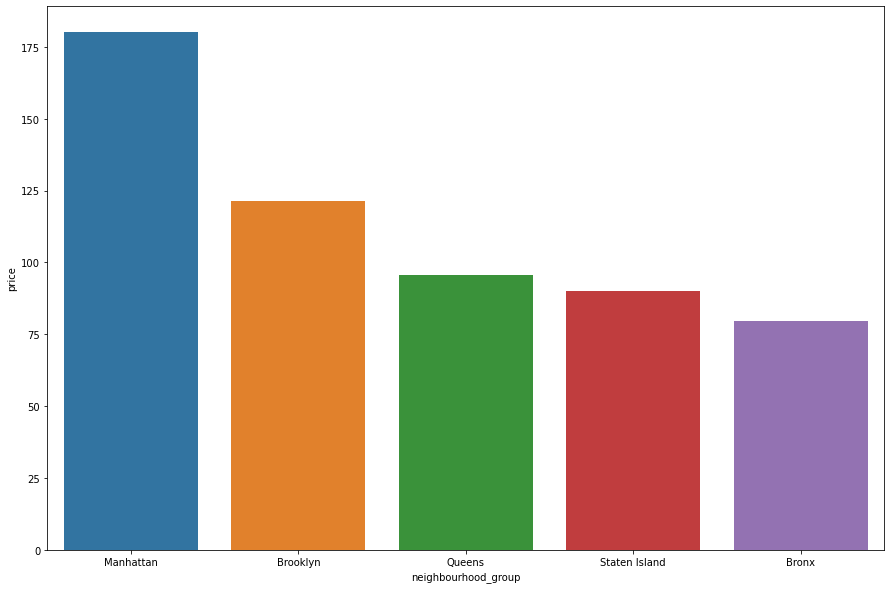

In [17]:
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(x = 'neighbourhood_group', y = 'price', 
    data = df2.groupby(['neighbourhood_group']).mean().reset_index().sort_values(by = ['price'], 
        ascending = 0),ax = ax)


## Question 3

In [18]:
df2 = df[['neighbourhood_group','neighbourhood','price']]
df2.head()

,neighbourhood_group,neighbourhood,price
0,Brooklyn,Kensington,149
1,Manhattan,Midtown,225
3,Brooklyn,Clinton Hill,89
4,Manhattan,East Harlem,80
5,Manhattan,Murray Hill,200


In [19]:
df2 = df2[df2['neighbourhood_group'] == 'Brooklyn']
df2

,neighbourhood_group,neighbourhood,price
0,Brooklyn,Kensington,149
3,Brooklyn,Clinton Hill,89
6,Brooklyn,Bedford-Stuyvesant,60
12,Brooklyn,South Slope,89
15,Brooklyn,Williamsburg,140
...,...,...,...
48534,Brooklyn,Bedford-Stuyvesant,68
48636,Brooklyn,Bedford-Stuyvesant,33
48701,Brooklyn,Bedford-Stuyvesant,45
48740,Brooklyn,Brooklyn Heights,550


In [20]:
df2.groupby(['neighbourhood']).mean().reset_index().sort_values(by = ['price'], ascending = 0)

,neighbourhood,price
40,Sea Gate,482.500000
8,Brooklyn Heights,201.959677
14,Cobble Hill,193.431818
34,Mill Basin,179.750000
12,Carroll Gardens,178.898990
19,DUMBO,178.375000
13,Clinton Hill,176.158333
44,Vinegar Hill,172.692308
36,Park Slope,169.858537
5,Boerum Hill,167.761905


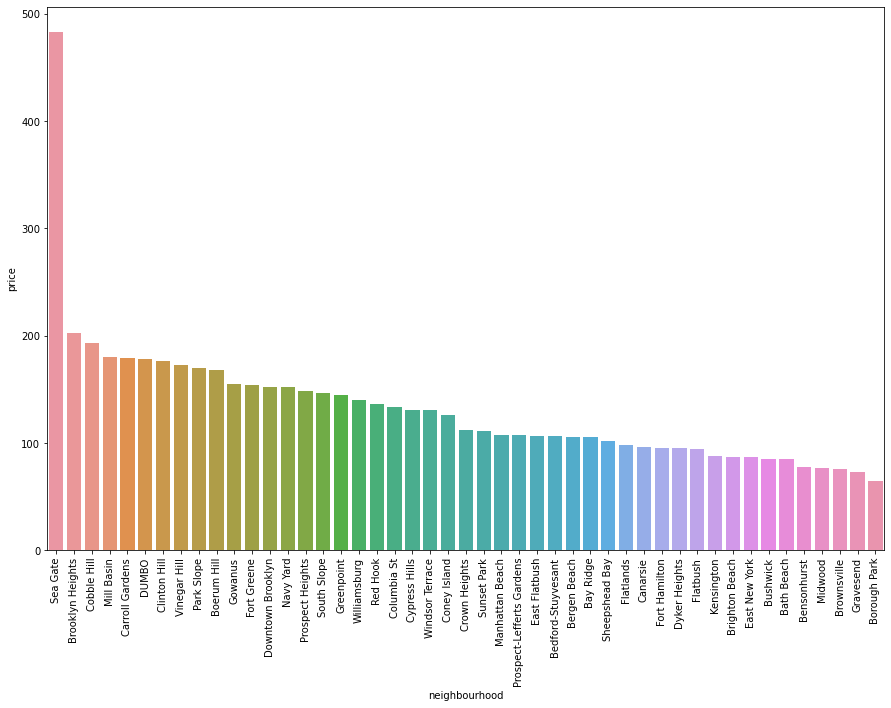

In [21]:
fig,ax = plt.subplots(figsize = (15,10)) #size of the graph
ax = sns.barplot(x = 'neighbourhood', y = 'price', #determine x and y 
    data = df2.groupby(['neighbourhood']).mean().reset_index().sort_values(by = ['price'], ascending = 0), ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);
#


## Question 4

In [22]:
df2 = df[['room_type','price']] # 
df2.head()

,room_type,price
0,Private room,149
1,Entire home/apt,225
3,Entire home/apt,89
4,Entire home/apt,80
5,Entire home/apt,200


In [23]:
df2.groupby(['room_type']).mean().reset_index().sort_values(by = ['price'])



,room_type,price
2,Shared room,63.213948
1,Private room,83.985272
0,Entire home/apt,196.315929


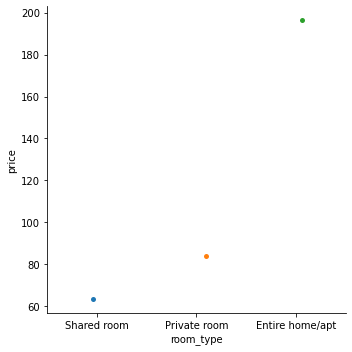

In [24]:
# fig,ax = plt.subplots(figsize = (15,10))
ax = sns.catplot(x = 'room_type', y = 'price', 
    data = df2.groupby(['room_type']).mean().reset_index().sort_values(by = ['price']))

#plot the graph, data grouped by room_type and sorted by price

# ax.set_xticklabels(ax.get_xticklabels(), rotation = 90); # rotate value of x for 90 degree



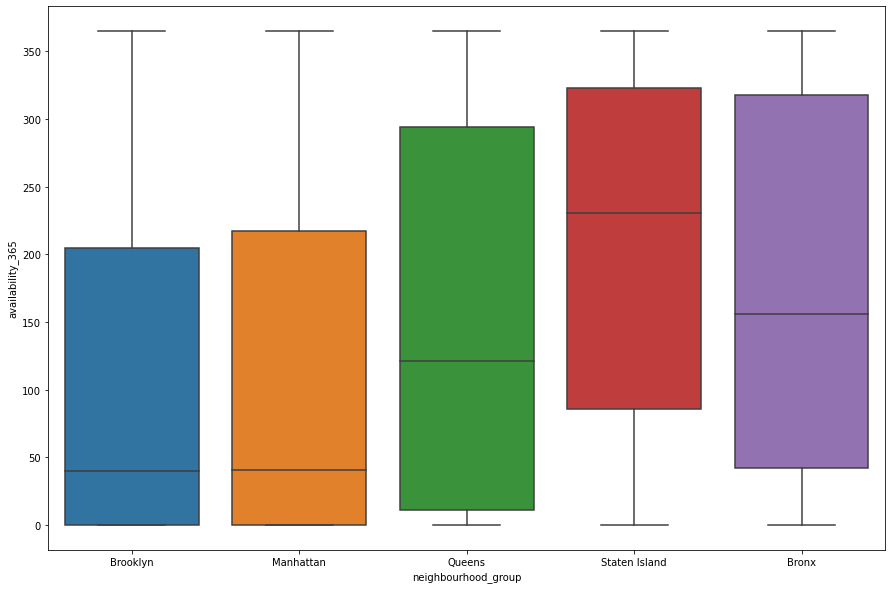

In [25]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365')
#boxlot for each neighbo group

## Question 5

In [26]:
df2 = df[['host_id','name']]
df2.head()

,host_id,name
0,2787,Clean & quiet apt home by the park
1,2845,Skylit Midtown Castle
3,4869,Cozy Entire Floor of Brownstone
4,7192,Entire Apt: Spacious Studio/Loft by central park
5,7322,Large Cozy 1 BR Apartment In Midtown East


In [27]:
df2.groupby(['host_id']).size().reset_index(name = 'count_hosts').sort_values(by = ['count_hosts']) 
# get count of row of each host_id and sort by count
#reset_index = превращает с индекс колума с обычный колумн


,host_id,count_hosts
0,2438,1
19185,47952362,1
19184,47933513,1
19183,47932600,1
19182,47931146,1
...,...,...
8269,7503643,49
25204,137358866,51
12010,16098958,61
20802,61391963,79


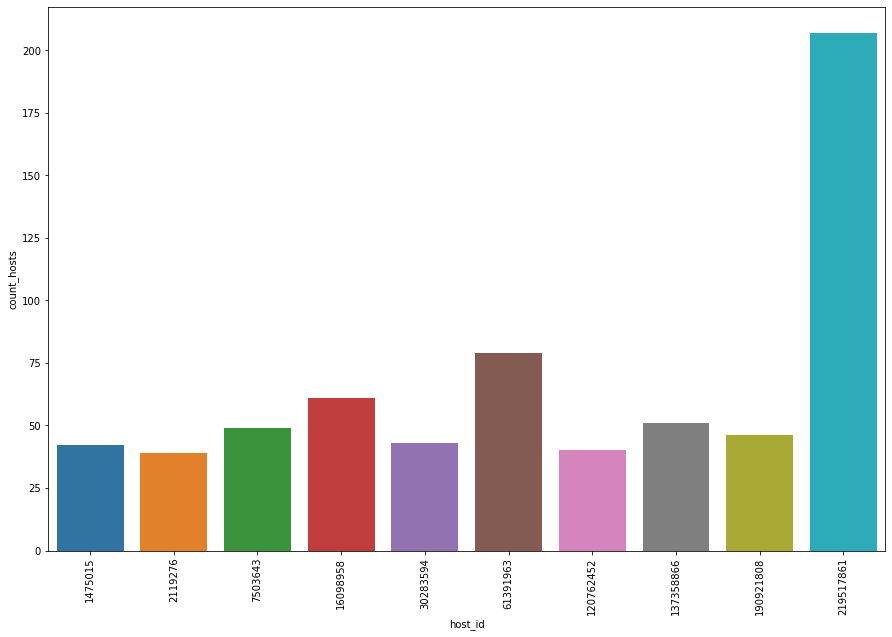

In [28]:
fig,ax = plt.subplots(figsize = (15,10)) #size of the graph
ax = sns.barplot(x = 'host_id', y = 'count_hosts', #determine x and y
    data = df2.groupby(['host_id']).size().reset_index(name = 'count_hosts').sort_values(by = ['count_hosts']).tail(10), ax= ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);